# Task_1: The Sparks Foundation - Exploratory Data Analysis on Retail Data


# By: Vakapalli Bharath Kumar

In [1]:
#import required Packages
import numpy as np
import pandas as pd

#for charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Import Dataset

In [2]:
df =pd.read_csv(r"C:\Users\91949\Documents\SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# 2. Data Inspection

In [5]:
#data observations
df.shape

(9994, 13)

In [6]:
#Columns of dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
#Identify Data types & Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Finding Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# 3. Data Cleaning

In [9]:
#Checking Duplicate values
df.duplicated().sum()

17

In [10]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [13]:
#Corelation between all parameters
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

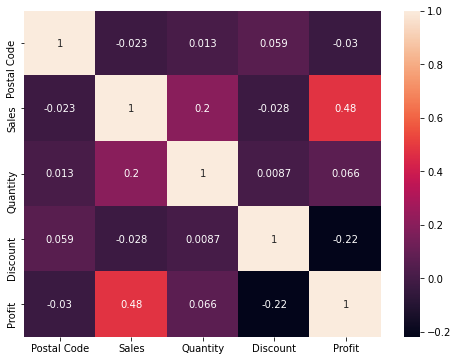

In [14]:
#Heat map of Corelation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot =True)

We found that, Corelation between Sales and Discount are pretty low.

# Exploratory Data Analysis

In [15]:
sales_profit = df.groupby('State')['Profit'].sum()

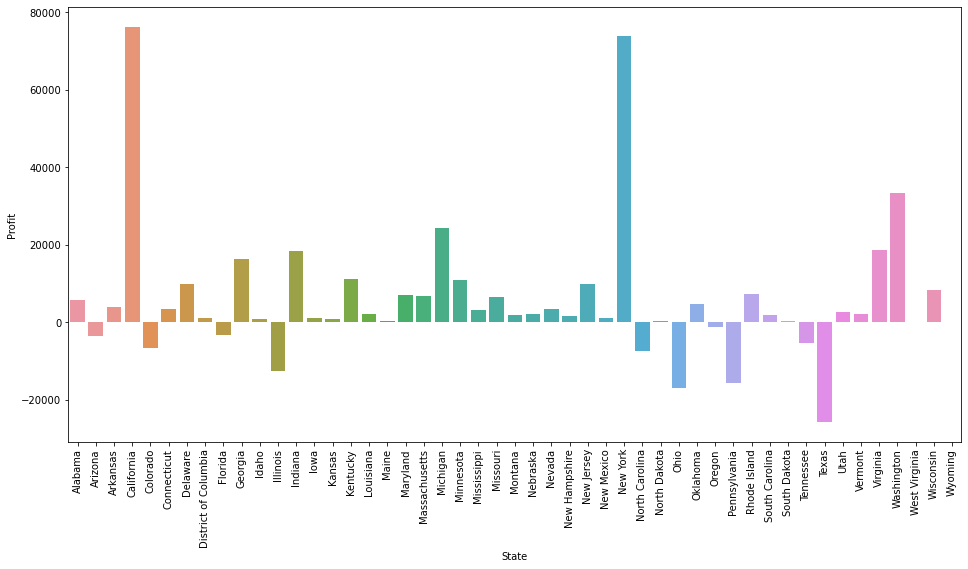

In [16]:
#Profits & Losses in every state
plt.figure(figsize=(16,8))
sns.barplot(x=sales_profit.index,
               y= sales_profit.values)
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.show()

New York and California states are on the top in profitwise.
 Texas, Ohio, Pennsylvania states are in huge lose.

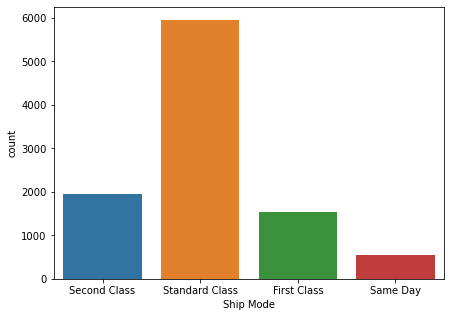

In [17]:
#Most Preferrable Shipment modes by customers

plt.figure(figsize=(7,5))
sns.countplot("Ship Mode",data = df)
plt.show()

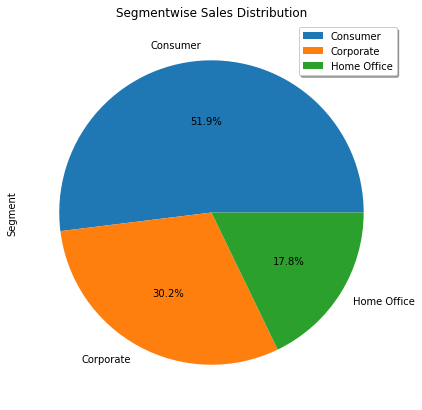

In [18]:
#Sales Distribution over each segment

plt.figure(figsize=(7,7))
df["Segment"].value_counts().plot(kind="pie",  autopct="%1.1f%%",   explode = [0,0,0])    

plt.title("Segmentwise Sales Distribution")

plt.legend(loc = 'upper right', shadow = True)
plt.show()

<AxesSubplot:xlabel='Region', ylabel='count'>

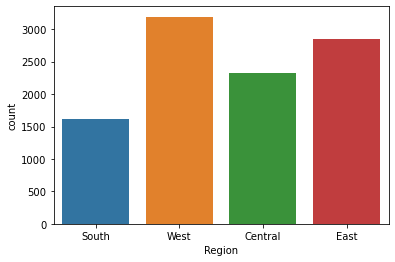

In [19]:
#Regionwise Sales

sns.countplot("Region", data = df)

<AxesSubplot:xlabel='Category', ylabel='count'>

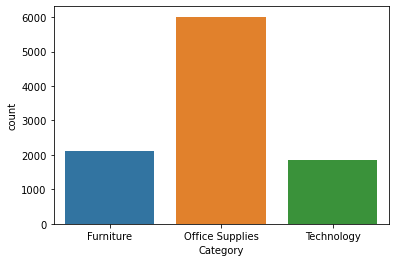

In [20]:
#Categorywise Sales

sns.countplot("Category", data = df)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

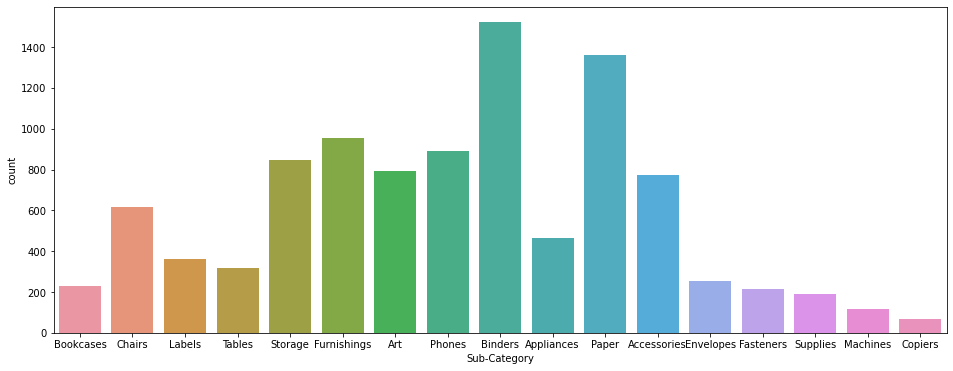

In [21]:
#Sale in Sub-Categories

plt.figure(figsize=(16,6))
sns.countplot("Sub-Category", data = df)

Binders & Papers are the highest sales and copiers are the least.

<AxesSubplot:xlabel='State'>

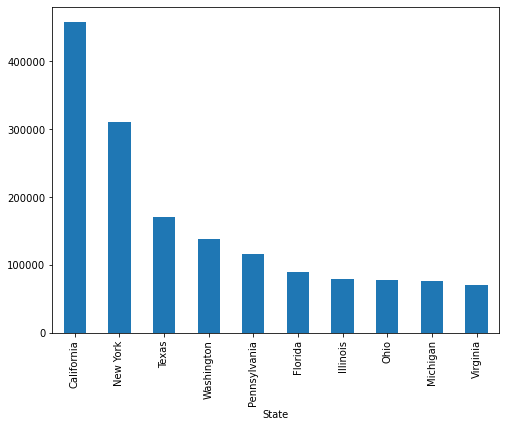

In [22]:
#Top 10 Sales states

plt.figure(figsize=(8,6))
sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
sales[:10].plot(kind = 'bar')

<AxesSubplot:title={'center':'Stateswise sales'}, ylabel='State'>

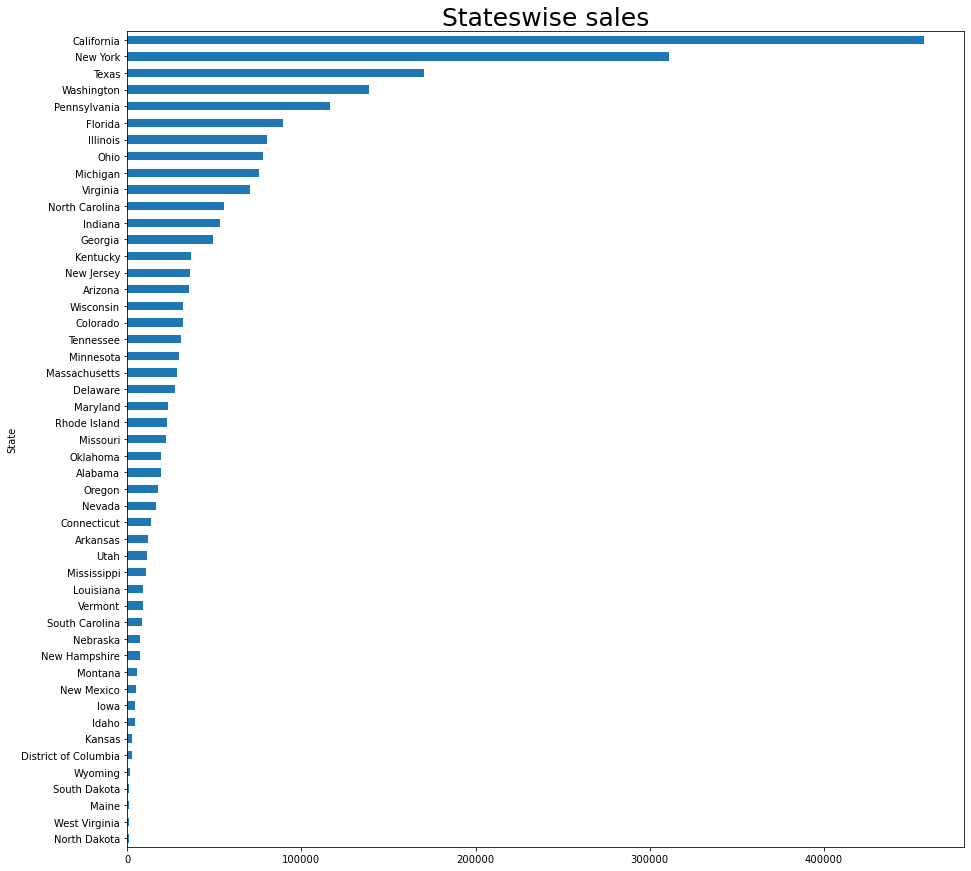

In [23]:
#Overall Top states in sales in ascending order

plt.figure(figsize=(15,15))
states = df.groupby('State')['Sales'].sum()
states.sort_values(ascending = True, inplace = True)
plt.title("Stateswise sales", size= 25)
states.plot.barh()

<AxesSubplot:xlabel='Sub-Category'>

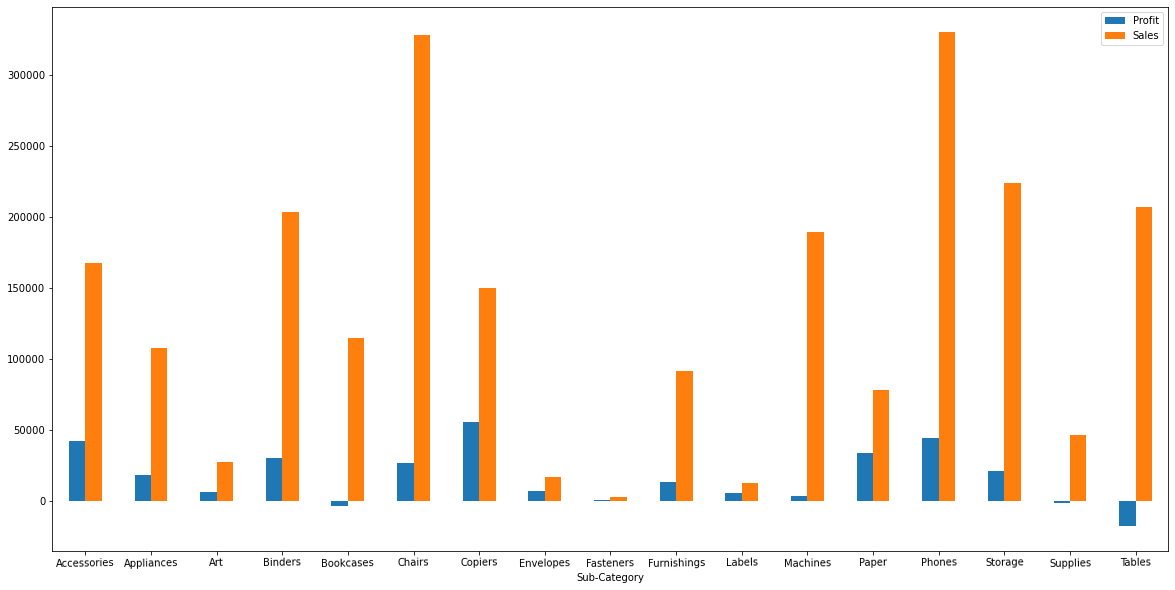

In [24]:
#Categoriwise Sales & Profits.

category = df.groupby(['Sub-Category'])['Profit', 'Sales'].sum()
category.plot.bar(rot=1,figsize=(20,10))

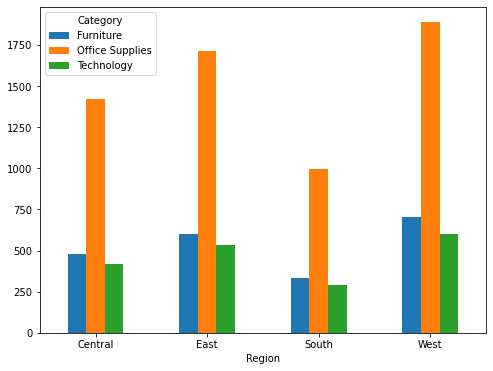

In [25]:
#Most preferable category by each region

pd.crosstab( df['Region'], df['Category']).plot(kind = 'bar', figsize =(8,6))
plt.xticks(rotation=360)
plt.show()

Most of the orders falls under Office Supplies.

<AxesSubplot:>

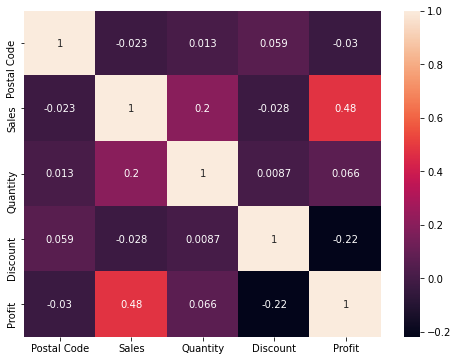

In [26]:
#Overall Corelation of retail Dataset

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot =True)

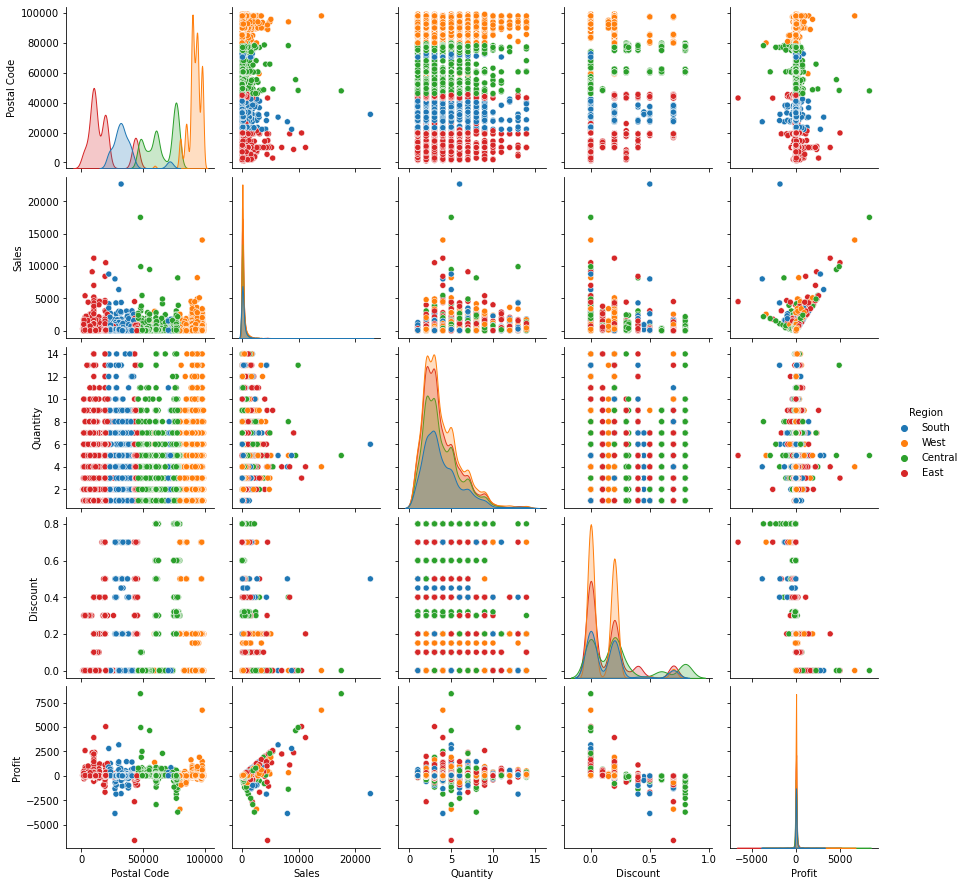

In [27]:
#Pairplot for better understand of relation

sns.pairplot(df, hue="Region")

CONCLUSION:

1. The profit and sales are highly corelated to each other.
2. No correlation between quantity and profit.
3. Cost should be reduced in some areas to increase the profit.
4. Give extra in segment area.
5. Increase the shipping mode.
6. Many states needs improvements in terms of category they should be sell      at reasonable price.

# Thank you for watching. Please share your view on my project.

#  Stay Safe & Stay Healthy
